# import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load datasets

In [2]:
content=pd.read_csv('F:\\AI Content\\Project\\Content.csv')
reaction=pd.read_csv('F:\AI Content\Project\Reactions.csv')
reaction_type=pd.read_csv('F:\AI Content\Project\ReactionTypes.csv')

In [3]:
content.drop(['Unnamed: 0'],axis=1,inplace=True)
reaction.drop(['Unnamed: 0'],axis=1,inplace=True)
reaction_type.drop(['Unnamed: 0'],axis=1,inplace=True)

#  1. Content 

In [4]:
content.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [5]:
content.shape

(1000, 5)

In [6]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
 4   URL         801 non-null    object
dtypes: object(5)
memory usage: 39.2+ KB


In [7]:
content.isna().sum() # Missing Values

Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [8]:
content.duplicated().sum() # Duplicate Values

0

In [9]:
content.groupby('Type')['Content ID'].count().sort_values() # Counts of labels in Content Type

Type
audio    236
GIF      244
video    259
photo    261
Name: Content ID, dtype: int64

In [13]:
content.Category.value_counts() # Unique counts in Category which need to be cleaned

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

In [14]:
content.Category=content.Category.str.strip()

In [15]:
# Cleaning Labels in Category Column
content.Category=np.where(content.Category.isin(['"technology"','Technology']),'technology',content.Category)
content.Category=np.where(content.Category.isin(['"animals"','Animals']),'animals',content.Category)
content.Category=np.where(content.Category.isin(['Travel']),'travel',content.Category)
content.Category=np.where(content.Category.isin(['"culture"','Culture']),'culture',content.Category)
content.Category=np.where(content.Category.isin(['"science"','Science']),'science',content.Category)
content.Category=np.where(content.Category.isin(['"fitness"','Fitness']),'fitness',content.Category)
content.Category=np.where(content.Category.isin(['"food"','Food']),'food',content.Category)
content.Category=np.where(content.Category.isin(['"healthy eating"','Healthy Eating']),'healthy eating',content.Category)
content.Category=np.where(content.Category.isin(['"cooking"','Cooking']),'cooking',content.Category)
content.Category=np.where(content.Category.isin(['"soccer"','Soccer']),'soccer',content.Category)
content.Category=np.where(content.Category.isin(['"tennis"','Tennis']),'tennis',content.Category)
content.Category=np.where(content.Category.isin(['"education"','Education']),'education',content.Category)
content.Category=np.where(content.Category.isin(['"dogs"','Dogs']),'dogs',content.Category)
content.Category=np.where(content.Category.isin(['"studying"','Studying','studing']),'studying',content.Category)
content.Category=np.where(content.Category.isin(['"veganism"','Veganism']),'veganism',content.Category)
content.Category=np.where(content.Category.isin(['"public speaking"','Public Speaking']),'public speaking',content.Category)

In [16]:
content.Category.value_counts() # labels Counts after cleaning

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

In [17]:
content.columns

Index(['Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [18]:
content.drop(['User ID','URL'],axis=1,inplace=True)

In [19]:
content.head() # Cleaned

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


# 2. Reaction

In [20]:
reaction.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [21]:
reaction.shape

(25553, 4)

In [22]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   User ID     22534 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: object(4)
memory usage: 798.7+ KB


In [23]:
reaction.isna().sum()

Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [24]:
reaction.duplicated().sum()

0

In [25]:
reaction.dropna(inplace=True) # Droping Missing Values

In [26]:
reaction.drop(['User ID','Datetime'],axis=1,inplace=True) # Drop Useless Columns

In [27]:
reaction.groupby('Type')['Content ID'].count().sort_values() # label count of Reaction Type

Type
intrigued      1354
worried        1379
cherish        1380
indifferent    1385
like           1391
super love     1393
dislike        1396
want           1396
disgust        1406
love           1411
hate           1420
interested     1425
adore          1427
scared         1436
peeking        1438
heart          1497
Name: Content ID, dtype: int64

In [28]:
reaction.head() # cleaned

,Content ID,Type
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested


# 3. Reation Type

In [29]:
reaction_type.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [30]:
reaction_type.shape

(16, 3)

In [31]:
reaction_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [32]:
reaction_type.isna().sum()

Type         0
Sentiment    0
Score        0
dtype: int64

In [33]:
reaction_type.duplicated().sum()

0

## Merging all datasets

In [34]:
react_reat=pd.merge(reaction,reaction_type,on=['Type']) #merged reaction and reaction type

In [35]:
final_data=pd.merge(react_reat,content,on=['Content ID']) # merge with Content

In [36]:
final_data.head()

,Content ID,Type_x,Sentiment,Score,Type_y,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,negative,10,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,negative,10,photo,studying


In [37]:
final_data.shape

(22534, 6)

In [38]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 0 to 22533
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  22534 non-null  object
 1   Type_x      22534 non-null  object
 2   Sentiment   22534 non-null  object
 3   Score       22534 non-null  int64 
 4   Type_y      22534 non-null  object
 5   Category    22534 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [39]:
final_data.isna().sum()

Content ID    0
Type_x        0
Sentiment     0
Score         0
Type_y        0
Category      0
dtype: int64

## five most popular Categories

In [40]:
categories=final_data.groupby('Category')['Score'].sum().sort_values(ascending=False).head()

In [41]:
categories

Category
animals           68624
science           65405
healthy eating    63138
technology        63035
food              61598
Name: Score, dtype: int64

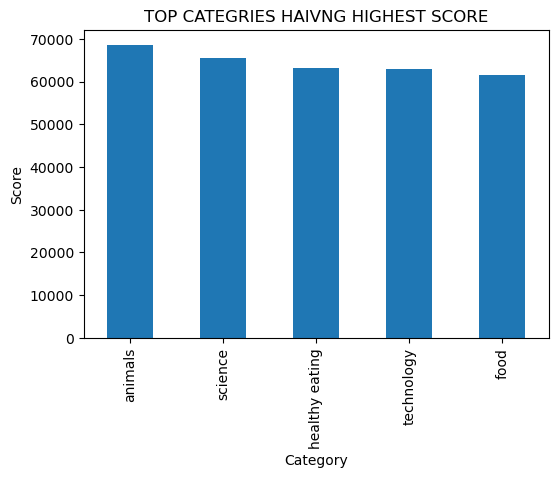

In [42]:
plt.figure(figsize=(6,4))
plt.title('TOP CATEGRIES HAIVNG HIGHEST SCORE')
categories.plot.bar()
plt.ylabel('Score')
plt.show()